In [60]:
%matplotlib inline
import numpy as np
import os
import matplotlib.pyplot as plt
import cPickle as pickle
import gzip

In [70]:
# SPIRE channels
lambdas = [250, 350, 500]
psf     = {250:18.1, 350:25.2, 500:36.6} # in arcsec 
factor  = {250:469./36., 350:831./64., 500:1804./144.} # Jy/beam -> Jy/pixel 

# H-ATLAS patches
patches = ['G9', 'G12', 'G15']#, 'NGP', 'SGP']

# Results folder
results_folder = 'results/'

zmin = 0.1
zmax = 5.

In [71]:
mean = {}
sims = {}
for lambda_ in lambdas:
    mean[lambda_] = {}
    sims[lambda_] = {}
    # Loop over patches
    for patch in patches:
            sims_ = pickle.load(gzip.open(results_folder + '/patch'+patch+'_lambda'+str(lambda_)+'_zmin'+str(zmin)+'_zmax'+str(zmax)+'.pkl','rb'))
            sims[lambda_][patch] = np.asarray(sims_['maps'])
            mean_ = pickle.load(gzip.open(results_folder + '/patch'+patch+'_lambda'+str(lambda_)+'_zmin'+str(zmin)+'_zmax'+str(zmax)+'_RND.pkl','rb'))
            mean[lambda_][patch] = mean_['maps']

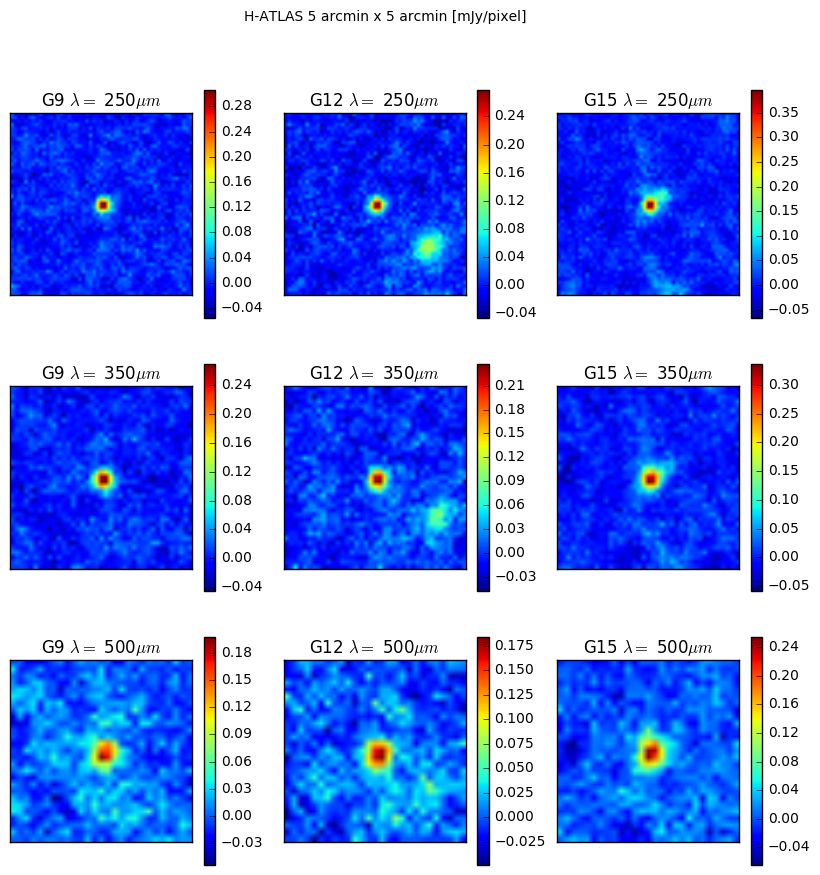

In [72]:
fig = plt.figure(figsize=(10,10))
i=1
plt.suptitle('H-ATLAS 5 arcmin x 5 arcmin [mJy/pixel]')
for lambda_ in lambdas:
    for patch in patches:
        plt.subplot(3,3,i)
        plt.title(patch + r' $\lambda= $ ' +str(lambda_) + r'$\mu m$')
#         plt.imshow((sims[lambda_][patch].mean(axis=0))/(factor[lambda_])/1e-3)
        plt.imshow((sims[lambda_][patch].mean(axis=0)-mean[lambda_][patch].mean())/(factor[lambda_])/1e-3)
        plt.colorbar()
        frame1 = plt.gca()
        frame1.axes.get_xaxis().set_visible(False)
        frame1.axes.get_yaxis().set_visible(False)
        i += 1
plt.show()

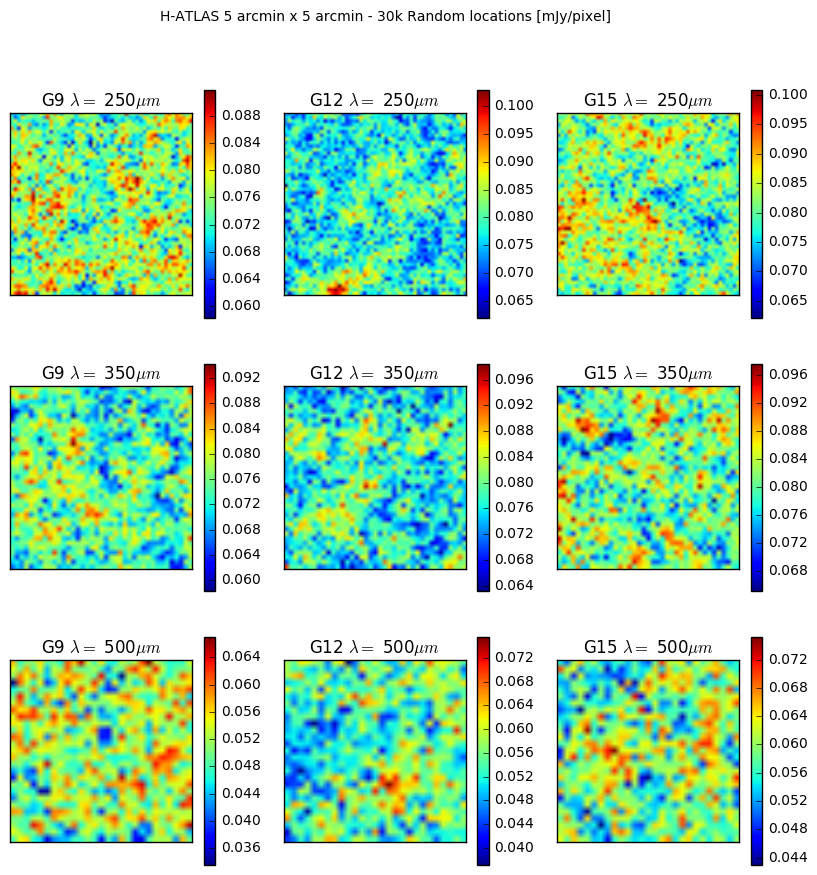

In [73]:
fig = plt.figure(figsize=(10,10))
i=1
plt.suptitle('H-ATLAS 5 arcmin x 5 arcmin - 30k Random locations [mJy/pixel]')
for lambda_ in lambdas:
    for patch in patches:
        plt.subplot(3,3,i)
        plt.title(patch + r' $\lambda= $ ' +str(lambda_) + r'$\mu m$')
        plt.imshow(mean[lambda_][patch]/factor[lambda_]/1e-3)
        plt.colorbar()
        frame1 = plt.gca()
        frame1.axes.get_xaxis().set_visible(False)
        frame1.axes.get_yaxis().set_visible(False)
        i += 1
plt.show()

In [74]:
print 'lambda', patch, 'N_obj'
for lambda_ in lambdas:
    for patch in patches:
        print lambda_, patch, sims[lambda_][patch].shape[0]

lambda G15 N_obj
250 G9 3127
250 G12 2926
250 G15 2623
350 G9 3116
350 G12 2925
350 G15 2621
500 G9 3110
500 G12 2905
500 G15 2610


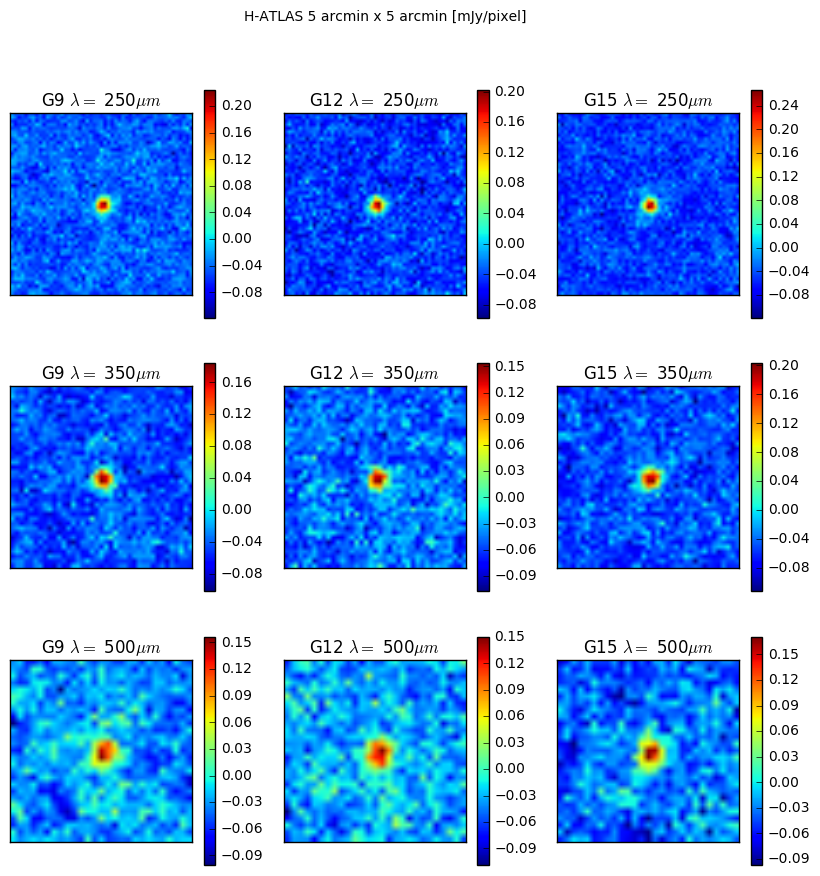

In [75]:
fig = plt.figure(figsize=(10,10))
i=1
plt.suptitle('H-ATLAS 5 arcmin x 5 arcmin [mJy/pixel]')
for lambda_ in lambdas:
    for patch in patches:
        plt.subplot(3,3,i)
        plt.title(patch + r' $\lambda= $ ' +str(lambda_) + r'$\mu m$')
#         plt.imshow((sims[lambda_][patch].mean(axis=0))/(factor[lambda_])/1e-3)
        plt.imshow(np.median(sims[lambda_][patch]-mean[lambda_][patch].mean(), axis=0)/(factor[lambda_])/1e-3)
        plt.colorbar()
        frame1 = plt.gca()
        frame1.axes.get_xaxis().set_visible(False)
        frame1.axes.get_yaxis().set_visible(False)
        i += 1
plt.show()